In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import datetime as dt
import os
import scipy.stats as stats
import pycountry
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

import warnings
warnings.filterwarnings('ignore')


## Understanding the GDP share of the construction sector

In [53]:

gfcf = pd.read_csv('Transformed Data/GFCF.csv')

gfcf['Year'] = pd.to_datetime(gfcf['Year'], format='%Y')

gfcf.head(10)
#gfcf.describe()

#geo represents the country code, we can use the unique() method to get the unique values of the column.
#time is the year, we can use the unique() method to get the unique values of the column.
#unit is the unit of measurement, we can use the unique() method to get the unique values of the column.

,unit,Year,Construction Value,Country,Dwellings Value
0,CP_MEUR,2015-01-01,36418.8,Austria,14658.8
1,CP_MEUR,2016-01-01,37227.7,Austria,15249.6
2,CP_MEUR,2017-01-01,39064.2,Austria,16556.5
3,CP_MEUR,2018-01-01,42484.1,Austria,17376.3
4,CP_MEUR,2019-01-01,45310.9,Austria,18672.7
5,CP_MEUR,2020-01-01,44886.7,Austria,18940.5
6,CP_MEUR,2021-01-01,50627.9,Austria,21372.6
7,CP_MEUR,2022-01-01,56034.8,Austria,23269.4
8,CP_MEUR,2015-01-01,61834.8,Switzerland,32215.5
9,CP_MEUR,2016-01-01,60133.6,Switzerland,31895.2


In [54]:
gfcf.isnull().sum() # checking null values, none for gfcf dataset

unit                  0
Year                  0
Construction Value    0
Country               0
Dwellings Value       0
dtype: int64

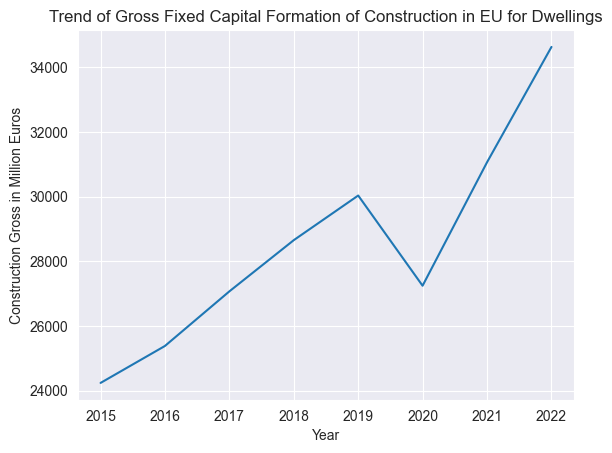

In [55]:
# Group the data by TIME_PERIOD and calculate the average production index for each year
yearly_average = gfcf.groupby('Year')['Dwellings Value'].mean()

# Plot the trend using a line plot
plt.plot(yearly_average.index, yearly_average.values)
plt.xlabel('Year')
plt.ylabel('Construction Gross in Million Euros')
plt.title('Trend of Gross Fixed Capital Formation of Construction in EU for Dwellings')
plt.show()

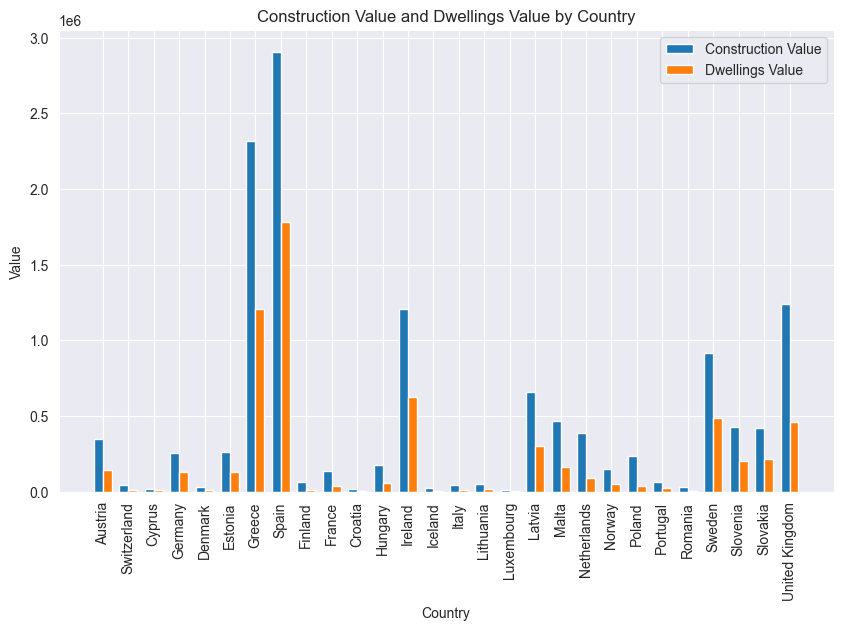

In [56]:
unique_countries = gfcf['Country'].unique()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(unique_countries))

rect1 = ax.bar(index, gfcf.groupby('Country')['Construction Value'].sum(), bar_width, label='Construction Value')
rect2 = ax.bar(index + bar_width, gfcf.groupby('Country')['Dwellings Value'].sum(), bar_width, label='Dwellings Value')

ax.set_xlabel('Country')
ax.set_ylabel('Value')
ax.set_title('Construction Value and Dwellings Value by Country')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(unique_countries, rotation='vertical')
ax.legend()

plt.show()

Year
2015-01-01    53056.267857
2016-01-01    53541.653571
2017-01-01    56063.150000
2018-01-01    59404.171429
2019-01-01    63321.317857
2020-01-01    54909.325926
2021-01-01    61280.251852
2022-01-01    69422.338462
Name: Construction Value, dtype: float64


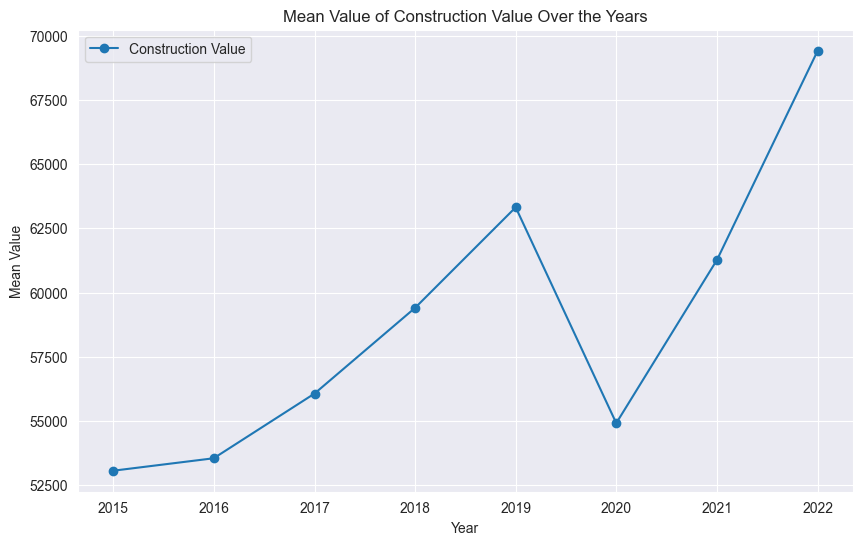

In [57]:
mean_values = gfcf.groupby('Year')['Construction Value'].mean()

print(mean_values)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(mean_values.index, mean_values, marker='o', label='Construction Value')


ax.set_xlabel('Year')
ax.set_ylabel('Mean Value')
ax.set_title('Mean Value of Construction Value Over the Years')
ax.legend()

plt.show()

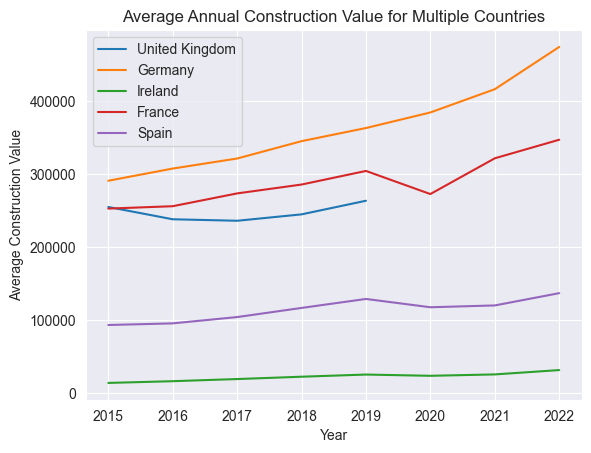

In [58]:
# Calculate mean values for each year and country
countries = ['United Kingdom', 'Germany','Ireland', 'France', 'Spain']
# mean_values = gfcf.groupby(['Year', 'Country']).mean().reset_index()

# Plot the mean production index values over time for each country
for country in countries:
    country_data = gfcf[gfcf['Country'] == country]
    mean_values = country_data.groupby('Year')['Construction Value'].mean()
    plt.plot(mean_values.index, mean_values.values, label=country)


plt.xlabel('Year')
plt.ylabel('Average Construction Value')
plt.title('Average Annual Construction Value for Multiple Countries')
plt.legend()
plt.show()

        unit       Year  Construction Value         Country  Dwellings Value
0    CP_MEUR 2015-01-01             36418.8         Austria          14658.8
1    CP_MEUR 2016-01-01             37227.7         Austria          15249.6
2    CP_MEUR 2017-01-01             39064.2         Austria          16556.5
3    CP_MEUR 2018-01-01             42484.1         Austria          17376.3
4    CP_MEUR 2019-01-01             45310.9         Austria          18672.7
..       ...        ...                 ...             ...              ...
215  CP_MEUR 2015-01-01            255287.7  United Kingdom          90926.4
216  CP_MEUR 2016-01-01            238457.3  United Kingdom          85255.3
217  CP_MEUR 2017-01-01            236405.9  United Kingdom          89516.0
218  CP_MEUR 2018-01-01            245183.2  United Kingdom          96023.6
219  CP_MEUR 2019-01-01            263833.4  United Kingdom          99809.7

[220 rows x 5 columns]
          Year  Construction Value  Country  Dwellin

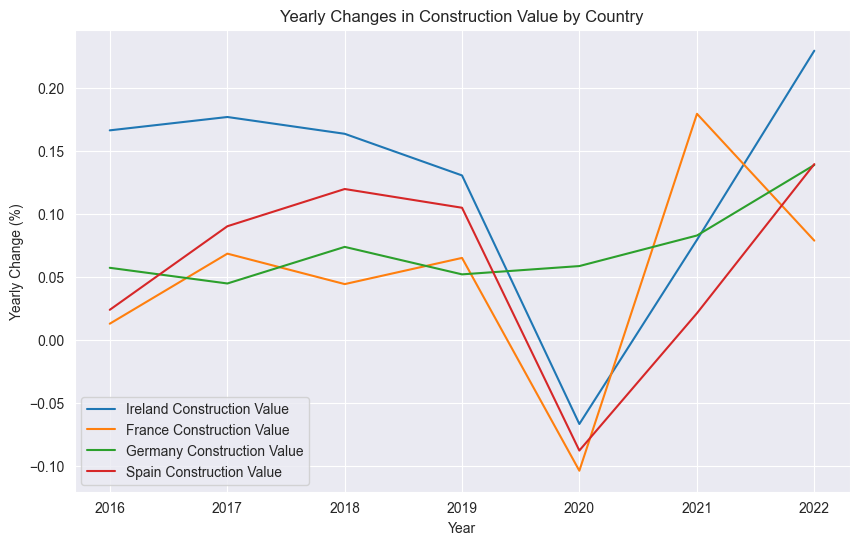

In [59]:
countries = ['Ireland', 'France', 'Germany', 'Spain']


print(gfcf)

# filter the data
filtered_data = gfcf[gfcf['Country'].isin(countries)]
filtered_data = filtered_data.drop('unit',axis=1)

print(filtered_data)

# Calculate the mean values for each year and country
mean_values = filtered_data.groupby(['Year', 'Country']).mean().reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot yearly changes for Total Labor Employment Index
for country in countries:
    country_data = mean_values[mean_values['Country'] == country]
    changes = country_data['Construction Value'].pct_change()
    ax.plot(country_data['Year'], changes, label=f'{country} Construction Value')


ax.set_xlabel('Year')
ax.set_ylabel('Yearly Change (%)')
ax.set_title('Yearly Changes in Construction Value by Country')
ax.legend()
plt.show()

## GVA Data for Construction Producer Index (CPPI)

In [60]:
gva = pd.read_csv('Transformed Data/GVA.csv')
gva['Year'] = pd.to_datetime(gva['Year'], format='%Y')

print(gva.shape,  '\n')
print(gva.columns, '\n')
print(gva.isnull().sum())
print(gva.describe())

gva.head()

(366, 4) 

Index(['unit', 'Year', 'Construction Producer Price', 'Country'], dtype='object') 

unit                           0
Year                           0
Construction Producer Price    0
Country                        0
dtype: int64
                                Year  Construction Producer Price
count                            366                   366.000000
mean   2015-12-27 09:26:33.442622976                 25845.671858
min              2010-01-01 00:00:00                   212.800000
25%              2013-01-01 00:00:00                  2126.525000
50%              2016-01-01 00:00:00                  9095.200000
75%              2019-01-01 00:00:00                 29097.000000
max              2022-01-01 00:00:00                211102.000000
std                              NaN                 38508.379075


,unit,Year,Construction Producer Price,Country
0,CP_MEUR,2010-01-01,17123.6,Austria
1,CP_MEUR,2011-01-01,17476.8,Austria
2,CP_MEUR,2012-01-01,18028.3,Austria
3,CP_MEUR,2013-01-01,18545.6,Austria
4,CP_MEUR,2014-01-01,18958.7,Austria


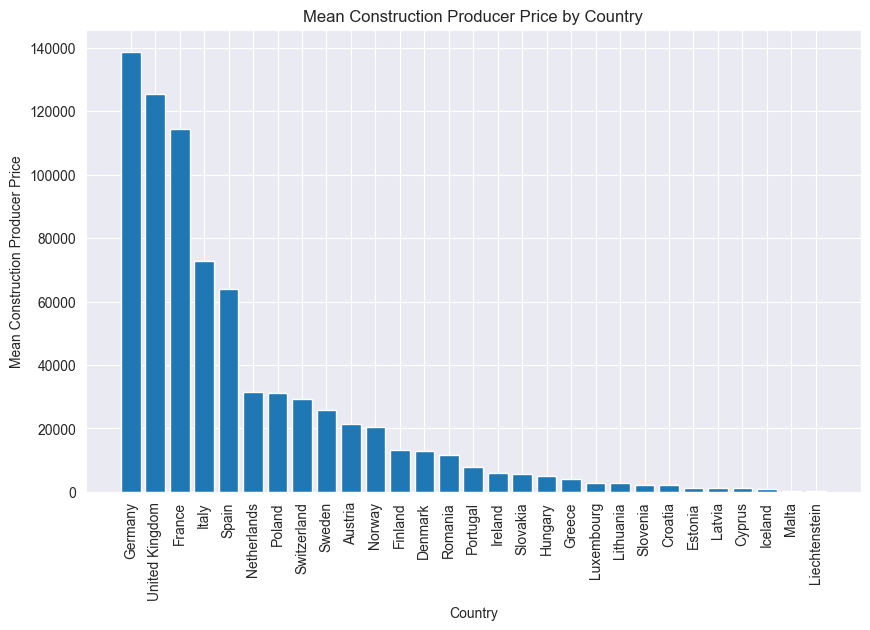

In [61]:
grouped_data = gva.groupby('Country')['Construction Producer Price'].mean()

sorted_data = grouped_data.sort_values(ascending=False)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(sorted_data.index, sorted_data)
plt.xlabel('Country')
plt.ylabel('Mean Construction Producer Price')
plt.title('Mean Construction Producer Price by Country')
plt.xticks(rotation=90)
plt.show()

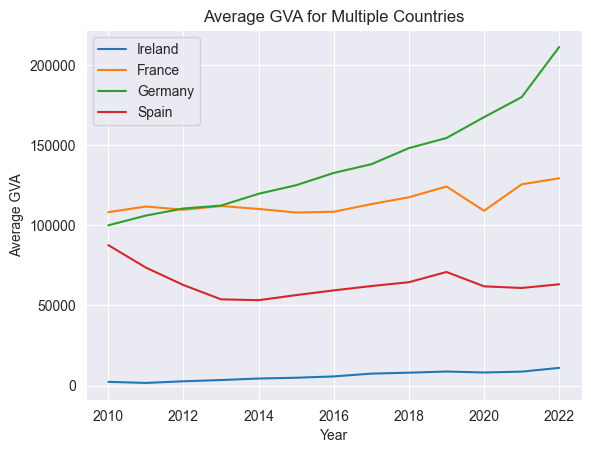

In [62]:
countries = ['Ireland', 'France', 'Germany', 'Spain']

# Plot the mean production index values over time for each country
for country in countries:
    country_data = gva[gva['Country'] == country]
    mean_values = country_data.groupby('Year')['Construction Producer Price'].mean()
    plt.plot(mean_values.index, mean_values.values, label=country)

plt.xlabel('Year')
plt.ylabel('Average GVA')
plt.title('Average GVA for Multiple Countries')
plt.legend()
plt.show()

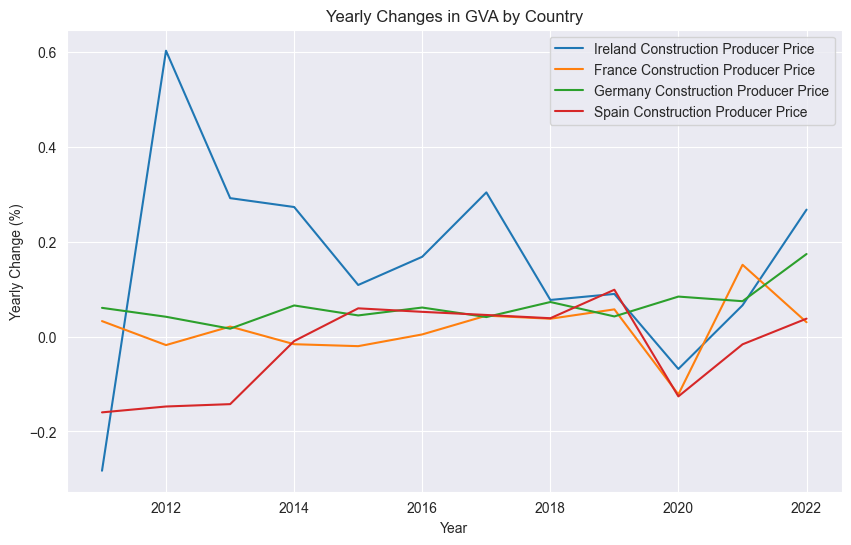

In [63]:
countries = ['Ireland', 'France', 'Germany', 'Spain']



# filter the data
filtered_data = gva[gva['Country'].isin(countries)]
filtered_data = filtered_data.drop('unit',axis=1)

# Calculate the mean values for each year and country
mean_values = filtered_data.groupby(['Year', 'Country']).mean().reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot yearly changes for Total Labor Employment Index
for country in countries:
    country_data = mean_values[mean_values['Country'] == country]
    changes = country_data['Construction Producer Price'].pct_change()
    ax.plot(country_data['Year'], changes, label=f'{country} Construction Producer Price')


ax.set_xlabel('Year')
ax.set_ylabel('Yearly Change (%)')
ax.set_title('Yearly Changes in GVA by Country')
ax.legend()
plt.show()

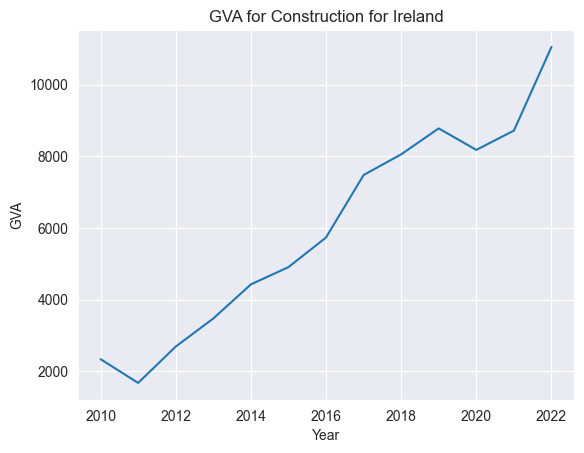

In [64]:
ir = 'Ireland'
country_data = gva[gva['Country'] == ir]

# Plot the production index values over time for the selected country
plt.plot(country_data['Year'], country_data['Construction Producer Price'])
plt.xlabel('Year')
plt.ylabel('GVA')
plt.title(f'GVA for Construction for {ir}')
plt.show()

## Structural Business Statistics

In [65]:
emp = pd.read_csv('Transformed Data/STS_Employment.csv')
enp = pd.read_csv("Transformed Data/STS_EnterpriseProduction.csv")
sub = pd.read_csv("Transformed Data/STS_SubContracting.csv")
turn = pd.read_csv("Transformed Data/STS_Turnover.csv")

print(f"Employment\n: {emp.head()}\n")
print(f"Enterprise Production\n: {enp.head()}\n")
print(f"Sub Contracting\n: {sub.head()}\n")
print(f"Turnover\n: {turn.head()}\n")

# renaming value type, oversight in etl notebook
emp = emp.rename(columns={'OBS_VALUE':'Total_Employment'})
enp = enp.rename(columns={'OBS_VALUE':'Total_Enterprise_Production'})
sub = sub.rename(columns={'OBS_VALUE':'Total_Sub_Contracting'})
turn = turn.rename(columns={'OBS_VALUE':'Total_Turnover'})

Employment
:   size_emp  Year  OBS_VALUE  Country
0    TOTAL  2011      31573  Austria
1    TOTAL  2012      32174  Austria
2    TOTAL  2013      33518  Austria
3    TOTAL  2014      34227  Austria
4    TOTAL  2015      34564  Austria

Enterprise Production
:    Year  OBS_VALUE  Country
0  2011    40266.5  Austria
1  2012    42190.4  Austria
2  2013    42335.2  Austria
3  2014    43373.8  Austria
4  2015    44959.3  Austria

Sub Contracting
:   size_emp  Year  OBS_VALUE   Country
0    TOTAL  2020    13629.4   Austria
1    TOTAL  2020    21030.3   Belgium
2    TOTAL  2020     4634.2  Bulgaria
3    TOTAL  2020     1446.0    Cyprus
4    TOTAL  2020    14851.6   Czechia

Turnover
:    Year  OBS_VALUE   Country
0  2020    53749.5   Austria
1  2020    67758.1   Belgium
2  2020    11253.2  Bulgaria
3  2020     4015.0    Cyprus
4  2020    33018.0   Czechia



In [66]:
# STS 1 represents the Employment and the Enterprise Production
sts1 = emp.merge(enp)
sts1['Year'] = pd.to_datetime(sts1['Year'], format='%Y')

# STS 2 represents the Sub contracting and the Enterprise Production
sts2 = sub.merge(turn)
sts2['Year'] = pd.to_datetime(sts2['Year'], format='%Y')


print(sts1.head())
print(sts2.head())

  size_emp       Year  Total_Employment  Country  Total_Enterprise_Production
0    TOTAL 2011-01-01             31573  Austria                      40266.5
1    TOTAL 2012-01-01             32174  Austria                      42190.4
2    TOTAL 2013-01-01             33518  Austria                      42335.2
3    TOTAL 2014-01-01             34227  Austria                      43373.8
4    TOTAL 2015-01-01             34564  Austria                      44959.3
  size_emp       Year  Total_Sub_Contracting   Country  Total_Turnover
0    TOTAL 2020-01-01                13629.4   Austria         53749.5
1    TOTAL 2020-01-01                 9770.8   Austria         53749.5
2    TOTAL 2020-01-01                21030.3   Belgium         67758.1
3    TOTAL 2020-01-01                 7876.8   Belgium         67758.1
4    TOTAL 2020-01-01                 4634.2  Bulgaria         11253.2


<Axes: >

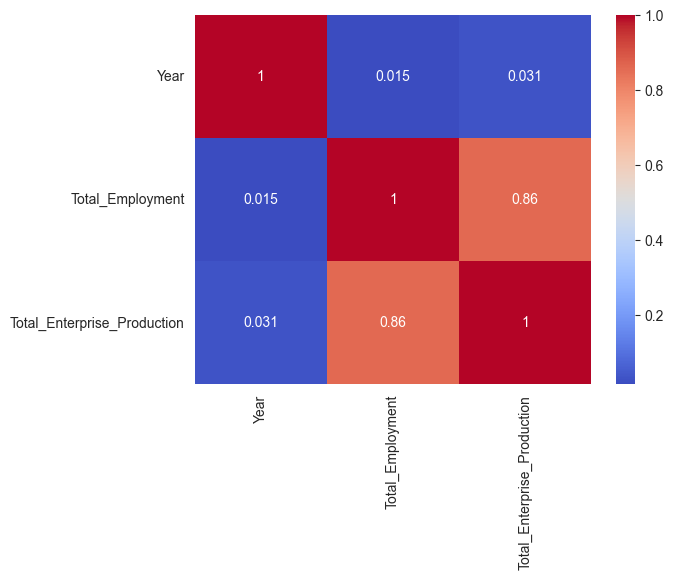

In [67]:
corr_df = sts1.drop(['size_emp','Country'],axis=1)

sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm')

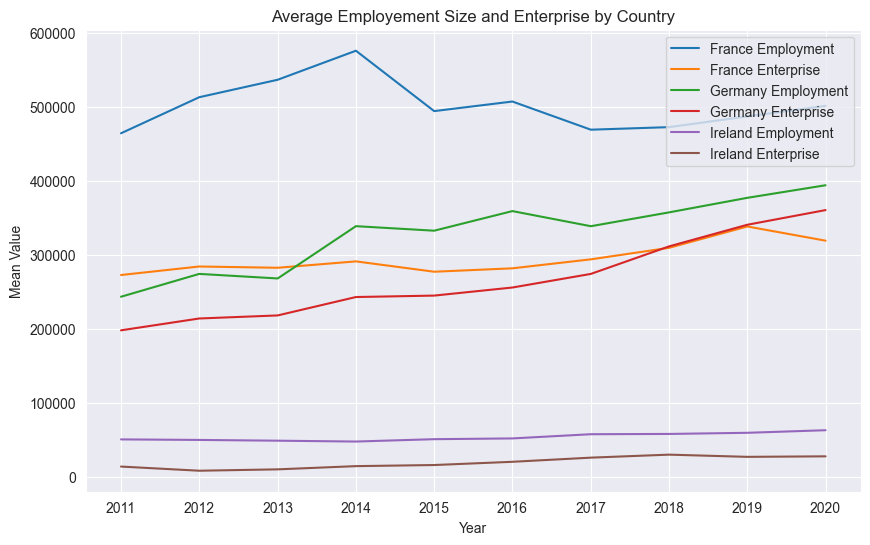

In [68]:
countries = ['Ireland', 'France', 'Germany']

sts1 = sts1.drop(['size_emp'],axis=1)
filtered_data = sts1[sts1['Country'].isin(countries)]

avg_values = filtered_data.groupby(['Year', 'Country']).mean().reset_index()

# Plot the average values for each country over time
fig, ax = plt.subplots(figsize=(10, 6))

countries = avg_values['Country'].unique()
for country in countries:
    country_data = avg_values[avg_values['Country'] == country]
    ax.plot(country_data['Year'], country_data['Total_Employment'], label=f'{country} Employment')
    ax.plot(country_data['Year'], country_data['Total_Enterprise_Production'], label=f'{country} Enterprise')

ax.set_xlabel('Year')
ax.set_ylabel('Mean Value')
ax.set_title('Average Employement Size and Enterprise by Country')
ax.legend(loc='upper right')

<Axes: >

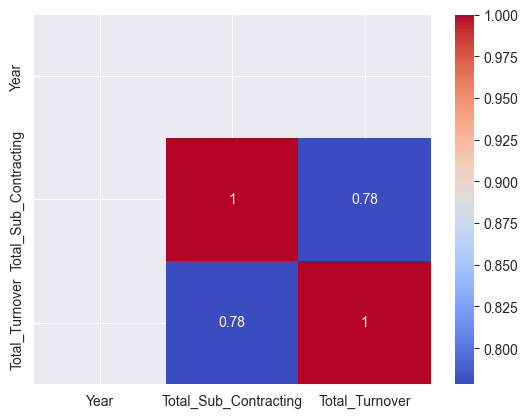

In [69]:
corr_df = sts2.drop(['size_emp','Country'],axis=1)

sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm')

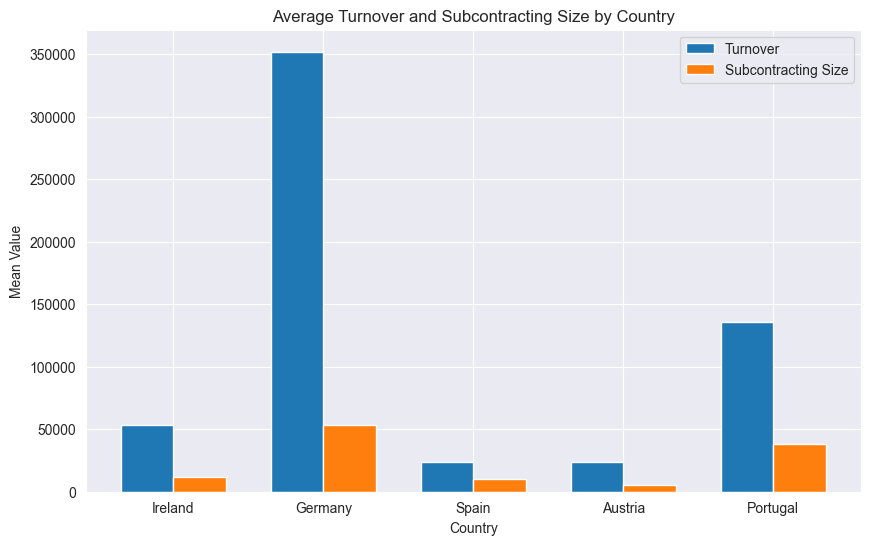

In [70]:
countries = ['Ireland', 'Germany', 'Spain', 'Austria', 'Portugal']

sts2 = sts2.drop(['size_emp'],axis=1)
filtered_data = sts2[sts2['Country'].isin(countries)]

# Calculate the average values for each country
avg_values = filtered_data.groupby('Country').mean().reset_index()

# Set the width of each bar
bar_width = 0.35

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Position of the bars on the x-axis
x = np.arange(len(countries))

# Plotting average turnover
ax.bar(x - bar_width/2, avg_values['Total_Turnover'], width=bar_width, label='Turnover')

# Plotting average subcontracting size
ax.bar(x + bar_width/2, avg_values['Total_Sub_Contracting'], width=bar_width, label='Subcontracting Size')

ax.set_xlabel('Country')
ax.set_ylabel('Mean Value')
ax.set_title('Average Turnover and Subcontracting Size by Country')
ax.set_xticks(x)
ax.set_xticklabels(countries)
ax.legend()

plt.show()

## Statistical Tests - STS

A significance level of 0.05 is commonly used in many scientific studies. It means that there's essentially a 5% chance of getting the observed result if the null hypothesis is true.

In [71]:
# Perform the Shapiro-Wilk test for normality distribution
def check_normality(data, group_column, country, variable):

    group_data = data[data[group_column] == country][variable]

    try:
        statistic, p_value = stats.shapiro(group_data)
    except ValueError:
        return False

    if p_value < 0.05:
        #print(f"{country} does not follow a normal distribution for {variable}")
        return False
    else:
        #print(f"{country} follows a normal distribution for {variable}")
        return True

In [72]:
# Use Levene's test for equality of variances
def check_variances(data, group_column, reference_country, country, variable):

    statistic, p_value = stats.levene(data[data[group_column] == reference_country][variable],
                                         data[data[group_column] == country][variable])

    if p_value < 0.05:
        #print(f"Variances are not equal across groups {reference_country} and {country}.")
        return False
    else:
        #print(f"Variances are equal across groups {reference_country} and {country}.")
        return True

In [73]:
def perform_t_test(data, country1, country2, variable, alpha=0.05):
    group1_data = data[data['Country'] == country1][variable]
    group2_data = data[data['Country'] == country2][variable]

    # Perform the t-test
    t_statistic, p_value = stats.ttest_ind(group1_data, group2_data)

    print(f't_statistic:{t_statistic}')
    print(f'p_value:{p_value}')

    # Compare the p-value with the significance level
    if p_value < alpha:
        print(f"There is a significant difference between the means of {variable} for {country1} and {country2}.")
    else:
        print(f"There is no significant difference between the means of {variable} for {country1} and {country2}.")

In [74]:
# Assumption: Independence
# Assuming independence is met through appropriate data collection methods

The below code tests the averages of the sts1 dataset for variables Total Employment and Total Enterprise Production vs Ireland. First it does a normality and variance test to see if it eligible for a ttest and performs if if the assumptions are met. A total of 15 t-tests were performed.

In [75]:
group_names = sts1['Country'].unique()
indices = np.where(group_names == "Ireland")
group_names = np.delete(group_names,indices) # drop Ireland from array

variables = ['Total_Employment','Total_Enterprise_Production']

test_count = 0

for var in variables:

    ireland_normal = check_normality(sts1,'Country','Ireland',variable=var)

    if ireland_normal:
        print(f'Ireland has normal dist for {var}, continuing with other country tests')
    else:
        continue

    for country in group_names:

        normal = check_normality(sts1,'Country',country,variable=var)
        variances = check_variances(sts1,'Country','Ireland',country,variable=var)

        if normal and variances:

            print(f'Parametric test possible for {country} on variable {var}')

            perform_t_test(sts1, 'Ireland', country, var)

            test_count += 1

print(f'A total of {test_count} t-tests were done')

Ireland has normal dist for Total_Employment, continuing with other country tests
Parametric test possible for Croatia on variable Total_Employment
t_statistic:18.44689191472501
p_value:3.869813608620926e-13
There is a significant difference between the means of Total_Employment for Ireland and Croatia.
Parametric test possible for Hungary on variable Total_Employment
t_statistic:-3.2576353862874248
p_value:0.004371247348428845
There is a significant difference between the means of Total_Employment for Ireland and Hungary.
Parametric test possible for Lithuania on variable Total_Employment
t_statistic:10.305537234261902
p_value:5.609039049044859e-09
There is a significant difference between the means of Total_Employment for Ireland and Lithuania.
Parametric test possible for Portugal on variable Total_Employment
t_statistic:-11.599422421826311
p_value:8.699750107935891e-10
There is a significant difference between the means of Total_Employment for Ireland and Portugal.
Parametric test 

rho value:0.8599643348558337
rho value:1.6583879960820037e-78
critical value: 1.9690597152559444
There is not enough evidence to support a correlation between the variables.


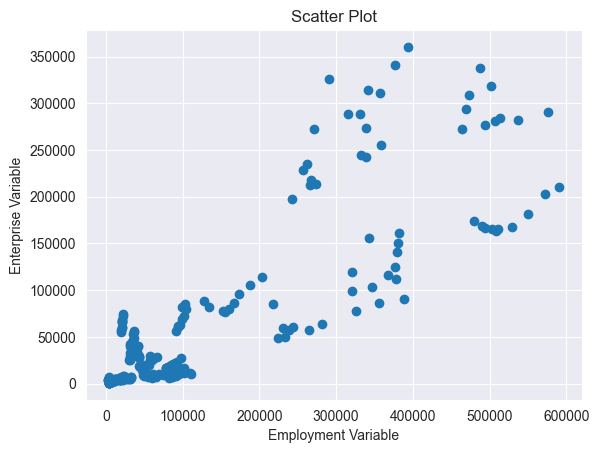

In [103]:
# Set the significance level (alpha)
alpha = 0.05

variable1 = sts1['Total_Employment']
variable2 = sts1['Total_Enterprise_Production']

# Calculate Spearman's correlation coefficient (rho) and p-value
rho, p_value = stats.spearmanr(variable1, variable2)

print(f'rho value:{rho}')
print(f'rho value:{p_value}')

# Determine the degrees of freedom (df)
n = len(variable1)
df = n - 2

# Calculate the critical value of rho based on the significance level and degrees of freedom
critical_value = stats.t.ppf(1 - alpha/2, df)

print(f'critical value: {critical_value}')

# Compare the calculated correlation coefficient (rho) with the critical value
if abs(rho) > critical_value:
    # Reject the null hypothesis and conclude that there is a statistically significant correlation
    print("There is a statistically significant correlation between the variables.")
else:
    # Fail to reject the null hypothesis and conclude that there is not enough evidence to support a correlation
    print("There is not enough evidence to support a correlation between the variables.")


plt.scatter(variable1, variable2)
plt.xlabel('Employment Variable')
plt.ylabel('Enterprise Variable')
plt.title('Scatter Plot')
plt.show()

In [77]:
# Perform ANOVA using statsmodels
model = ols('Total_Employment ~ C(Country)', data=sts1).fit()
results = sm.stats.anova_lm(model, typ=2)

residuals = model.resid # residuals for a model

# Check normality assumption
normality_test = stats.shapiro(residuals)

if normality_test.pvalue < 0.05:
    print("The residuals do not follow a normal distribution. Anova is not valid for this test")

    print('Doing a non parametric test: Kruskal-Wallis test instead of Anova')

    grouped_residuals = [residuals[sts1['Country'] == country] for country in sts1['Country'].unique()]

    # Perform Kruskal-Wallis test
    statistic, p_value = stats.kruskal(*grouped_residuals)

    if p_value < 0.05:
        print("There is a significant difference between the means of the groups.")
    else:
        print("There is no significant difference between the means of the groups.")

else:
    print("The residuals follow a normal distribution.")

    # Extract the F-statistic and p-value
    f_statistic = results['F']['C(Country)']
    p_value = results['PR(>F)']['C(Country)']

    if p_value < 0.05:
        print("There is a significant difference between the means of the groups.")
    else:
        print("There is no significant difference between the means of the groups.")


The residuals do not follow a normal distribution. Anova is not valid for this test
Doing a non parametric test: Kruskal-Wallis test instead of Anova
There is no significant difference between the means of the groups.


In [78]:
# Perform ANOVA using statsmodels
model = ols('Total_Enterprise_Production ~ C(Country)', data=sts1).fit()
results = sm.stats.anova_lm(model, typ=2)

residuals = model.resid # residuals for a model

# Check normality assumption
normality_test = stats.shapiro(residuals)

if normality_test.pvalue < 0.05:
    print("The residuals do not follow a normal distribution. Anova is not valid for this test")

    print('Doing a non parametric test: Kruskal-Wallis test instead of Anova')

    grouped_residuals = [residuals[sts1['Country'] == country] for country in sts1['Country'].unique()]

    # Perform Kruskal-Wallis test
    statistic, p_value = stats.kruskal(*grouped_residuals)

    if p_value < 0.05:
        print("There is a significant difference between the means of the groups.")
    else:
        print("There is no significant difference between the means of the groups.")

else:
    print("The residuals follow a normal distribution.")

    # Extract the F-statistic and p-value
    f_statistic = results['F']['C(Country)']
    p_value = results['PR(>F)']['C(Country)']

    if p_value < 0.05:
        print("There is a significant difference between the means of the groups.")
    else:
        print("There is no significant difference between the means of the groups.")


The residuals do not follow a normal distribution. Anova is not valid for this test
Doing a non parametric test: Kruskal-Wallis test instead of Anova
There is no significant difference between the means of the groups.


## Short Term Business Stats

In [79]:
build = pd.read_csv('Transformed Data/Building Permit.csv')
build['Year'] = pd.to_datetime(build['Year'], format='%Y')

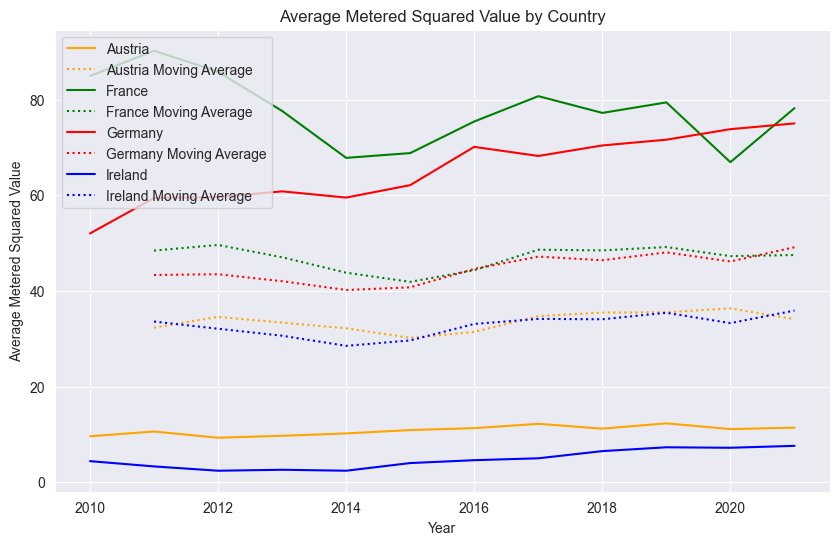

In [80]:
# Calculate the average 'Metered Squared Value' for each country each year
countries = ['Ireland', 'France', 'Austria', 'Germany']

# Filter the data for the selected countries
filtered_data = build[build['Country'].isin(countries)]

avg_values = filtered_data.groupby(['Year', 'Country'])['Metered Squared Value'].mean().reset_index()

# Calculate the 5-year moving average
window = 5
avg_values['Moving Average'] = avg_values['Metered Squared Value'].rolling(window).mean()


# Define colors for each country
country_colors = {'Ireland': 'blue', 'France': 'green', 'Austria': 'orange', 'Germany': 'red'}

# Plot the average values for each country over time
fig, ax = plt.subplots(figsize=(10, 6))

countries = avg_values['Country'].unique()
for country in countries:
    country_data = avg_values[avg_values['Country'] == country]
    ax.plot(country_data['Year'], country_data['Metered Squared Value'], color=country_colors[country], label=country)
    ax.plot(country_data['Year'], country_data['Moving Average'], linestyle='dotted', color=country_colors[country], label=f'{country} Moving Average')

ax.set_xlabel('Year')
ax.set_ylabel('Average Metered Squared Value')
ax.set_title('Average Metered Squared Value by Country')
ax.legend()

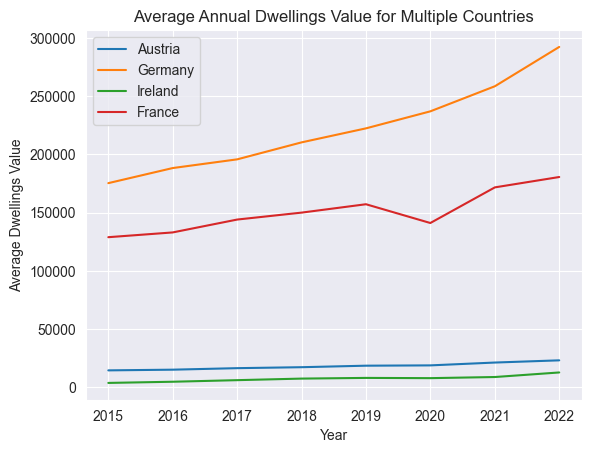

In [81]:
# Calculate mean values for each year and country
countries = ['Austria', 'Germany','Ireland', 'France']
# mean_values = gfcf.groupby(['Year', 'Country']).mean().reset_index()

# Plot the mean production index values over time for each country
for country in countries:
    country_data = gfcf[gfcf['Country'] == country]
    mean_values = country_data.groupby('Year')['Dwellings Value'].mean()
    plt.plot(mean_values.index, mean_values.values, label=country)


plt.xlabel('Year')
plt.ylabel('Average Dwellings Value')
plt.title('Average Annual Dwellings Value for Multiple Countries')
plt.legend()
plt.show()

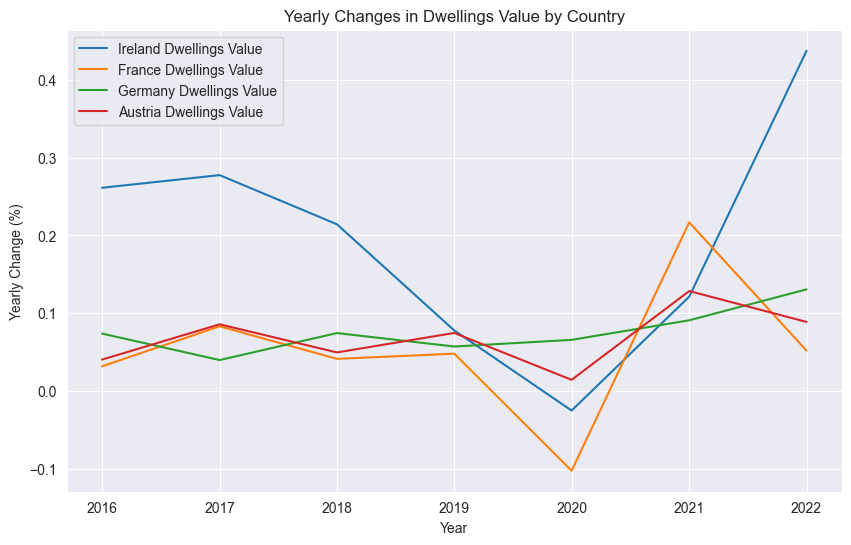

In [82]:
countries = ['Ireland', 'France', 'Germany', 'Austria']

gfcf = gfcf.drop('unit',axis=1)
# filter the data
filtered_data = gfcf[gfcf['Country'].isin(countries)]

# Calculate the mean values for each year and country
mean_values = filtered_data.groupby(['Year', 'Country']).mean().reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot yearly changes for Total Labor Employment Index
for country in countries:
    country_data = mean_values[mean_values['Country'] == country]
    changes = country_data['Dwellings Value'].pct_change()
    ax.plot(country_data['Year'], changes, label=f'{country} Dwellings Value')


ax.set_xlabel('Year')
ax.set_ylabel('Yearly Change (%)')
ax.set_title('Yearly Changes in Dwellings Value by Country')
ax.legend()
plt.show()

## Construction Cost

In [83]:
hours = pd.read_csv('Transformed Data/Labor_Hours.csv')
wages = pd.read_csv('Transformed Data/Labor_Wages.csv')
prod_value = pd.read_csv('Transformed Data/Production in Construction.csv')
labor_emp = pd.read_csv('Transformed Data/Labor_Employment.csv')

# rename the columns
hours = hours.rename(columns={'OBS_VALUE':'Total Hours Index'})
wages = wages.rename(columns={'OBS_VALUE':'Total Wages Index'})
labor_emp = labor_emp.rename(columns={'OBS_VALUE':'Total Labor Employment Index'})

labor_input = labor_emp.merge(hours).merge(wages)
labor_input['Year'] = pd.to_datetime(labor_input['Year'], format='%Y')
labor_input.head()

,unit,Year,Total Labor Employment Index,Country,Total Hours Index,Total Wages Index
0,I15,2008-01-01,97.3,Austria,101.2,85.8
1,I15,2009-01-01,100.1,Austria,100.4,88.2
2,I15,2010-01-01,99.1,Austria,99.5,88.4
3,I15,2011-01-01,101.3,Austria,101.8,91.8
4,I15,2012-01-01,103.1,Austria,102.7,95.7


    unit       Year  Total Labor Employment Index         Country   
0    I15 2008-01-01                          97.3         Austria  \
1    I15 2009-01-01                         100.1         Austria   
2    I15 2010-01-01                          99.1         Austria   
3    I15 2011-01-01                         101.3         Austria   
4    I15 2012-01-01                         103.1         Austria   
..   ...        ...                           ...             ...   
382  I15 2015-01-01                         100.0  United Kingdom   
383  I15 2016-01-01                         102.7  United Kingdom   
384  I15 2017-01-01                         108.4  United Kingdom   
385  I15 2018-01-01                         108.7  United Kingdom   
386  I15 2019-01-01                         111.8  United Kingdom   

     Total Hours Index  Total Wages Index  
0                101.2               85.8  
1                100.4               88.2  
2                 99.5               88

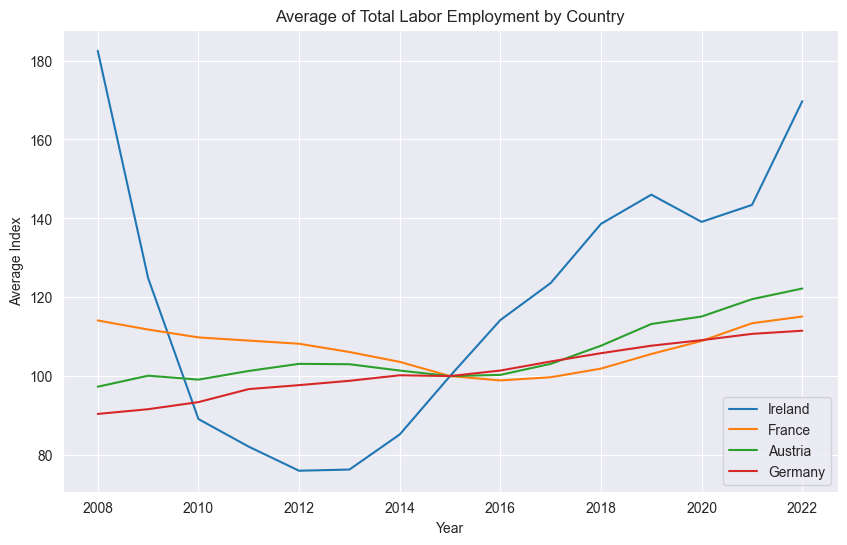

In [84]:
countries = ['Ireland', 'France', 'Austria', 'Germany']

print(labor_input)

labor_input = labor_input.drop('unit',axis=1)

# Filter the data for the selected countries
filtered_data = labor_input[labor_input['Country'].isin(countries)]

# Calculate the mean values for each year and country
mean_values = filtered_data.groupby(['Year', 'Country']).mean().reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot mean values for Total Labor Employment Index
for country in countries:
    country_data = mean_values[mean_values['Country'] == country]
    ax.plot(country_data['Year'], country_data['Total Labor Employment Index'], label=country)

ax.set_xlabel('Year')
ax.set_ylabel('Average Index')
ax.set_title('Average of Total Labor Employment by Country')
ax.legend()
plt.show()

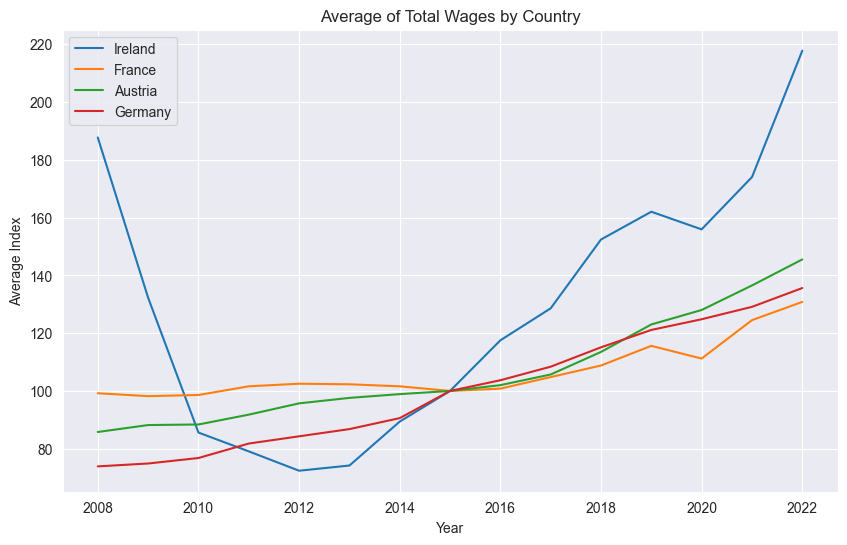

In [85]:
countries = ['Ireland', 'France', 'Austria', 'Germany']

# Filter the data for the selected countries
filtered_data = labor_input[labor_input['Country'].isin(countries)]

# Calculate the mean values for each year and country
mean_values = filtered_data.groupby(['Year', 'Country']).mean().reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

for country in countries:
    country_data = mean_values[mean_values['Country'] == country]
    ax.plot(country_data['Year'], country_data['Total Wages Index'], label=country)

ax.set_xlabel('Year')
ax.set_ylabel('Average Index')
ax.set_title('Average of Total Wages by Country')
ax.legend()
plt.show()

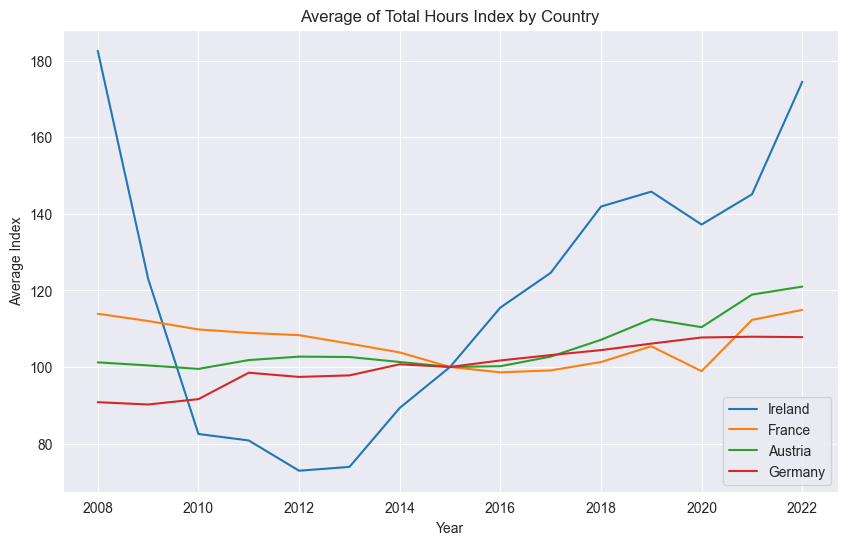

In [86]:
countries = ['Ireland', 'France', 'Austria', 'Germany']

# Filter the data for the selected countries
filtered_data = labor_input[labor_input['Country'].isin(countries)]

# Calculate the mean values for each year and country
mean_values = filtered_data.groupby(['Year', 'Country']).mean().reset_index()

fig, ax = plt.subplots(figsize=(10, 6))

for country in countries:
    country_data = mean_values[mean_values['Country'] == country]
    ax.plot(country_data['Year'], country_data['Total Hours Index'], label=country)

ax.set_xlabel('Year')
ax.set_ylabel('Average Index')
ax.set_title('Average of Total Hours Index by Country')
ax.legend()
plt.show()

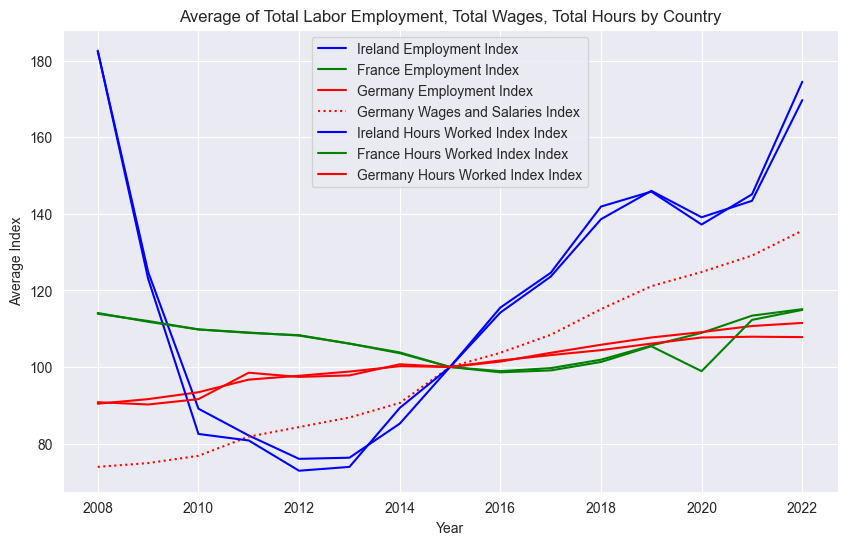

In [87]:
countries = ['Ireland', 'France', 'Germany']

# Filter the data for the selected countries
filtered_data = labor_input[labor_input['Country'].isin(countries)]

# Calculate the mean values for each year and country
mean_values = filtered_data.groupby(['Year', 'Country']).mean().reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
# Define colors for each country
country_colors = {'Ireland': 'blue', 'France': 'green', 'Germany': 'red'}

# Plot mean values for Total Labor Employment Index
for country in countries:
    country_data = mean_values[mean_values['Country'] == country]
    ax.plot(country_data['Year'], country_data['Total Labor Employment Index'], color=country_colors[country], label=f'{country} Employment Index')

# Plot mean values for Total Wages Index
for country in countries:
    country_data = mean_values[mean_values['Country'] == country]
ax.plot(country_data['Year'], country_data['Total Wages Index'], linestyle='dotted', color=country_colors[country], label=f'{country} Wages and Salaries Index')

# Plot mean values for Total Hours Index
for country in countries:
    country_data = mean_values[mean_values['Country'] == country]
    ax.plot(country_data['Year'], country_data['Total Hours Index'],color=country_colors[country], label=f'{country} Hours Worked Index Index')

ax.set_xlabel('Year')
ax.set_ylabel('Average Index')
ax.set_title('Average of Total Labor Employment, Total Wages, Total Hours by Country')
ax.legend()
plt.show()

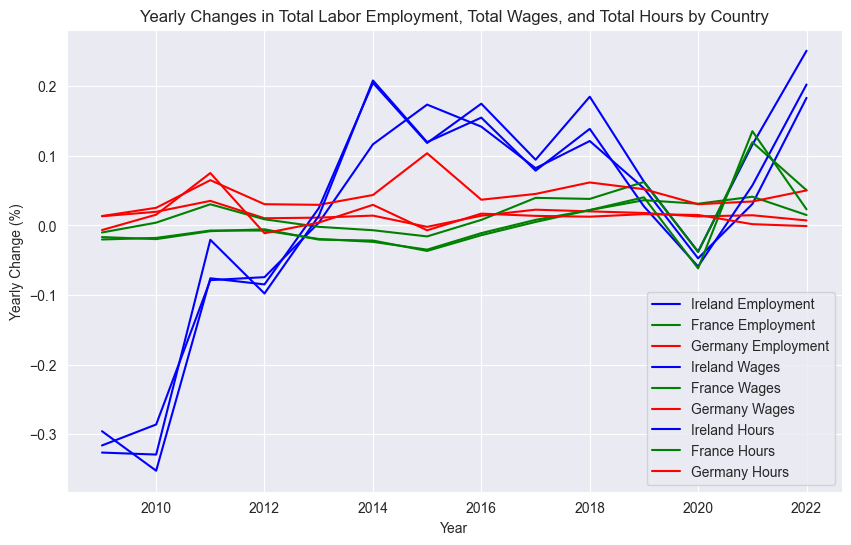

In [88]:
filtered_data = labor_input[labor_input['Country'].isin(countries)]

# Calculate the mean values for each year and country
mean_values = filtered_data.groupby(['Year', 'Country']).mean().reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Define colors for each country
country_colors = {'Ireland': 'blue', 'France': 'green', 'Germany': 'red'}

# Plot yearly changes for Total Labor Employment Index
for country in countries:
    country_data = mean_values[mean_values['Country'] == country]
    changes = country_data['Total Labor Employment Index'].pct_change()
    ax.plot(country_data['Year'], changes, color=country_colors[country], label=f'{country} Employment')

# Plot yearly changes for Total Wages Index
for country in countries:
    country_data = mean_values[mean_values['Country'] == country]
    changes = country_data['Total Wages Index'].pct_change()
    ax.plot(country_data['Year'], changes, color=country_colors[country], label=f'{country} Wages')

# Plot yearly changes for Total Hours Index
for country in countries:
    country_data = mean_values[mean_values['Country'] == country]
    changes = country_data['Total Hours Index'].pct_change()
    ax.plot(country_data['Year'], changes,color=country_colors[country], label=f'{country} Hours')

ax.set_xlabel('Year')
ax.set_ylabel('Yearly Change (%)')
ax.set_title('Yearly Changes in Total Labor Employment, Total Wages, and Total Hours by Country')
ax.legend()
plt.show()

<Axes: >

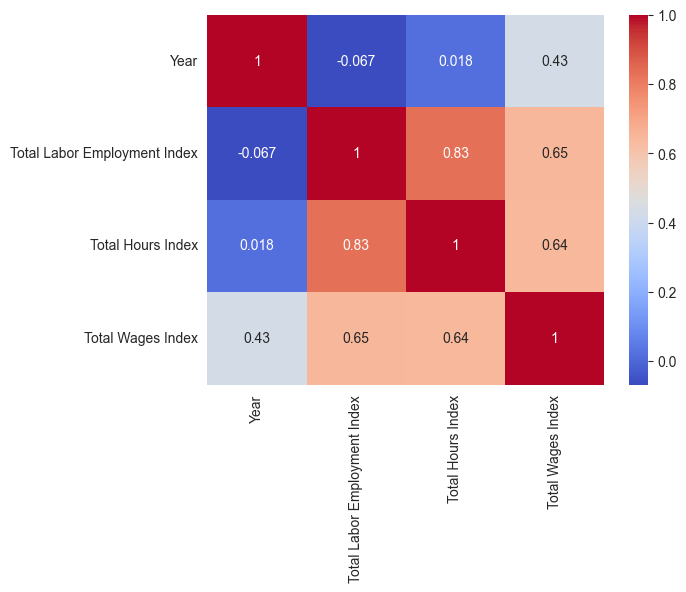

In [89]:
corr_df = labor_input.drop('Country',axis=1)

sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm')

In [90]:
prod_value = prod_value.rename(columns={'OBS_VALUE 1':'Civil Engineering Index', 'Production Value': 'Construction Index'})
prod_value['Year'] = pd.to_datetime(prod_value['Year'], format='%Y')

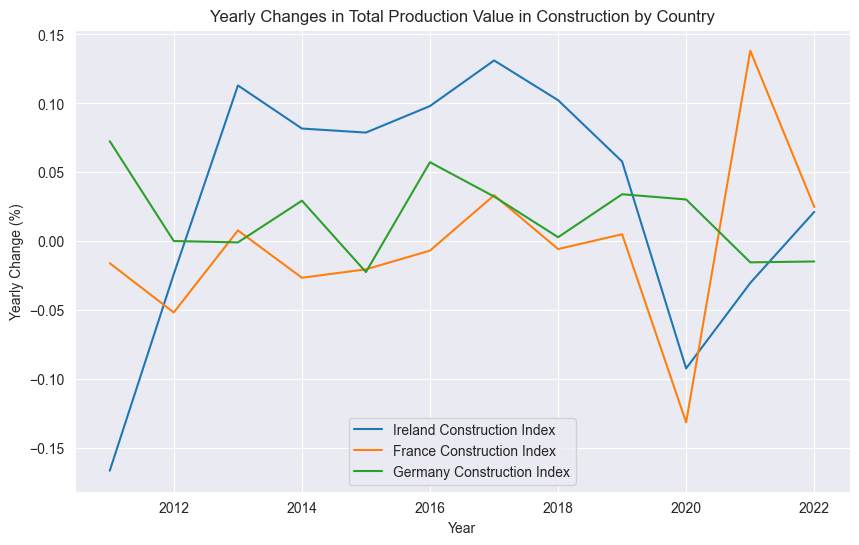

In [91]:
prod_value = prod_value.drop('unit',axis=1)
filtered_data = prod_value[prod_value['Country'].isin(countries)]

# Calculate the mean values for each year and country
mean_values = filtered_data.groupby(['Year', 'Country']).mean().reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot yearly changes for Total Labor Construction Index
for country in countries:
    country_data = mean_values[mean_values['Country'] == country]
    changes = country_data['Construction Index'].pct_change()
    ax.plot(country_data['Year'], changes, label=f'{country} Construction Index')


ax.set_xlabel('Year')
ax.set_ylabel('Yearly Change (%)')
ax.set_title('Yearly Changes in Total Production Value in Construction by Country')
ax.legend()
plt.show()

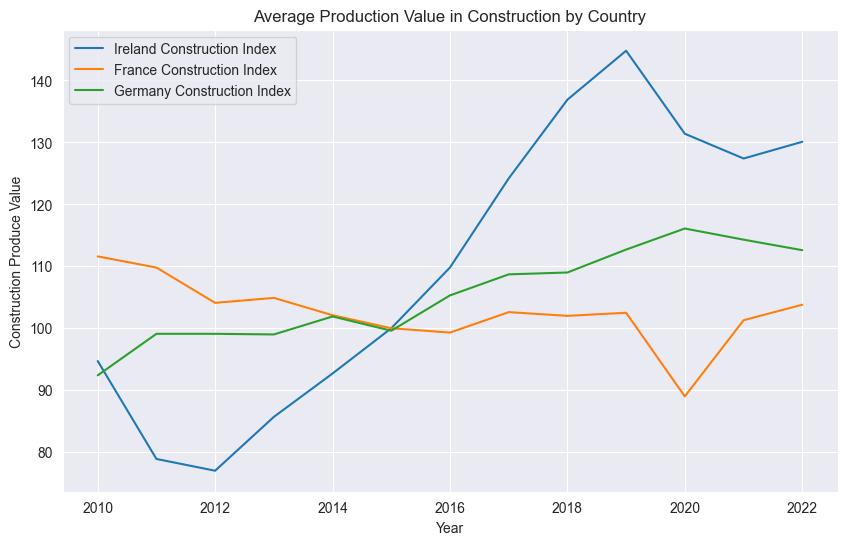

In [92]:
filtered_data = prod_value[prod_value['Country'].isin(countries)]

# Calculate the mean values for each year and country
mean_values = filtered_data.groupby(['Year', 'Country']).mean().reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot yearly changes for Total Labor Construction Index
for country in countries:
    country_data = mean_values[mean_values['Country'] == country]
    changes = country_data['Construction Index']
    ax.plot(country_data['Year'], changes, label=f'{country} Construction Index')


ax.set_xlabel('Year')
ax.set_ylabel('Construction Produce Value')
ax.set_title('Average Production Value in Construction by Country')
ax.legend()
plt.show()

In [93]:
# combining production value and labor input
pl_input = labor_input.merge(prod_value)

         Year  Country  Civil Engineering Index  Construction Index
1  2010-01-01  Germany                     86.4                92.4
4  2011-01-01  Germany                     96.5                99.1
7  2012-01-01  Germany                     94.2                99.1
10 2013-01-01  Germany                     95.4                99.0
13 2014-01-01  Germany                    101.0               101.9
16 2015-01-01  Germany                     99.7                99.6
19 2016-01-01  Germany                    102.6               105.3
22 2017-01-01  Germany                    107.8               108.7
25 2018-01-01  Germany                    112.7               109.0
28 2019-01-01  Germany                    119.6               112.7
31 2020-01-01  Germany                    126.5               116.1
34 2021-01-01  Germany                    127.7               114.3
37 2022-01-01  Germany                    131.7               112.6


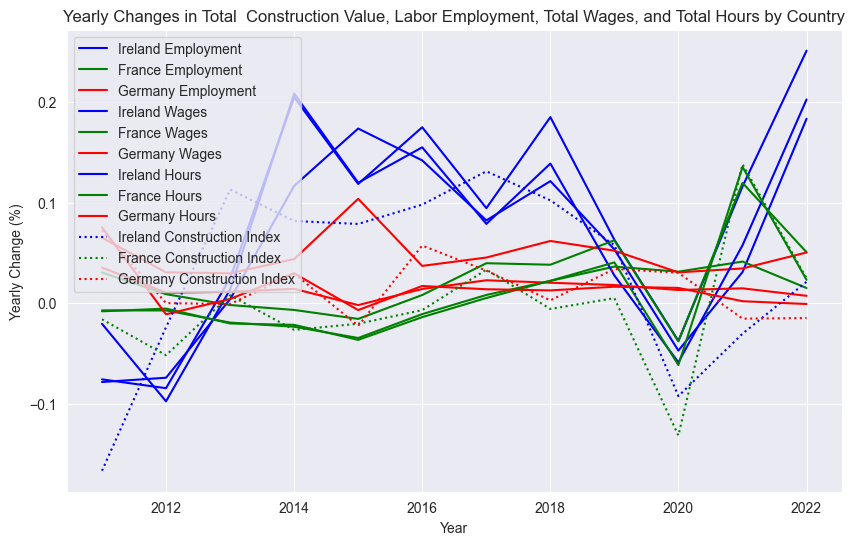

In [94]:
filtered_data = pl_input[pl_input['Country'].isin(countries)]

# Calculate the mean values for each year and country
mean_values = filtered_data.groupby(['Year', 'Country']).mean().reset_index()

fig, ax = plt.subplots(figsize=(10, 6))

# Define colors for each country
country_colors = {'Ireland': 'blue', 'France': 'green', 'Germany': 'red'}

print(country_data)

# Plot yearly changes for Total Labor Employment Index
for country in countries:
    country_data = mean_values[mean_values['Country'] == country]
    changes = country_data['Total Labor Employment Index'].pct_change()
    ax.plot(country_data['Year'], changes, color=country_colors[country], label=f'{country} Employment')

# Plot yearly changes for Total Wages Index
for country in countries:
    country_data = mean_values[mean_values['Country'] == country]
    changes = country_data['Total Wages Index'].pct_change()
    ax.plot(country_data['Year'], changes, color=country_colors[country], label=f'{country} Wages')

# Plot yearly changes for Total Hours Index
for country in countries:
    country_data = mean_values[mean_values['Country'] == country]
    changes = country_data['Total Hours Index'].pct_change()
    ax.plot(country_data['Year'], changes,color=country_colors[country], label=f'{country} Hours')

# Plot yearly changes for Total Construction  Index
for country in countries:
    country_data = mean_values[mean_values['Country'] == country]
    changes = country_data['Construction Index'].pct_change()
    ax.plot(country_data['Year'], changes,color=country_colors[country], label=f'{country} Construction Index', linestyle='dotted')

ax.set_xlabel('Year')
ax.set_ylabel('Yearly Change (%)')
ax.set_title('Yearly Changes in Total  Construction Value, Labor Employment, Total Wages, and Total Hours by Country')
ax.legend()
plt.show()

In [95]:
pl_input = pl_input.rename(columns={'Total Labor Employment Index':'Labor_Employment', 'Total Hours Index':'Total_Hours', 'Total Wages Index':'Total_Wages', 'Construction Index':'Construction_Value'})

In [96]:
# ANOVA for Labor Employment, Total Hours and Total Wages

group_names = pl_input['Country'].unique()

filtered_data = pl_input[pl_input['Country'].isin(group_names)]

variables = ['Labor_Employment', 'Total_Hours', 'Total_Wages']

valid_anova = dict.fromkeys(variables,[]) # collect valid countries in dict of empty lists

test_count = 0

for var in variables:

    ireland_normal = check_normality(pl_input,'Country','Ireland',variable=var)

    if ireland_normal:
        print(f'Ireland has normal dist for {var}, continuing with other country tests')
    else:
        continue

    for country in group_names:

        normal = check_normality(pl_input,'Country',country,variable=var)
        variances = check_variances(pl_input,'Country','Ireland',country,variable=var)

        if normal and variances:

            print(f'Parametric test possible for {country} on variable {var}')

            valid_anova[var].append(country)

for var,value in valid_anova.items():

    grouped_data = []  #empty list

    for country in value:

        group_data = filtered_data[filtered_data['Country'] == country][var]
        grouped_data.append(group_data)

    print(f'Performing anova test for {str(value)} on {var}')

    statistic, p_value = stats.f_oneway(*grouped_data)

    if p_value < 0.05:
        print("There is a significant difference between the groups.")
    else:
        print("There is no significant difference between the groups.")


Ireland has normal dist for Labor_Employment, continuing with other country tests
Parametric test possible for Cyprus on variable Labor_Employment
Parametric test possible for Ireland on variable Labor_Employment
Parametric test possible for Netherlands on variable Labor_Employment
Ireland has normal dist for Total_Hours, continuing with other country tests
Parametric test possible for Cyprus on variable Total_Hours
Parametric test possible for Croatia on variable Total_Hours
Parametric test possible for Ireland on variable Total_Hours
Parametric test possible for Netherlands on variable Total_Hours
Ireland has normal dist for Total_Wages, continuing with other country tests
Parametric test possible for Cyprus on variable Total_Wages
Parametric test possible for Ireland on variable Total_Wages
Parametric test possible for Lithuania on variable Total_Wages
Parametric test possible for Latvia on variable Total_Wages
Parametric test possible for Netherlands on variable Total_Wages
Perform

In [97]:
group_names = pl_input['Country'].unique()

significant = []
non_significant = []

for country in group_names:

    group_data = pl_input[pl_input['Country'] == country]

    print("Performing Wilcoxon signed-rank test for paired variables: Labor_Employment and Total_Wages")

    statistic, p_value = stats.wilcoxon(group_data['Labor_Employment'], group_data['Total_Wages'], alternative='two-sided')

    if p_value < 0.05:
        print(f"There is a significant difference between Labor_Employment and Total_Wages for {country}")
        significant.append(country)
    else:
        print(f"There is no significant difference between Labor_Employment and Total_Wages {country}")
        non_significant.append(country)


Performing Wilcoxon signed-rank test for paired variables: Labor_Employment and Total_Wages
There is no significant difference between Labor_Employment and Total_Wages Austria
Performing Wilcoxon signed-rank test for paired variables: Labor_Employment and Total_Wages
There is a significant difference between Labor_Employment and Total_Wages for Cyprus
Performing Wilcoxon signed-rank test for paired variables: Labor_Employment and Total_Wages
There is no significant difference between Labor_Employment and Total_Wages Germany
Performing Wilcoxon signed-rank test for paired variables: Labor_Employment and Total_Wages
There is no significant difference between Labor_Employment and Total_Wages Denmark
Performing Wilcoxon signed-rank test for paired variables: Labor_Employment and Total_Wages
There is no significant difference between Labor_Employment and Total_Wages Estonia
Performing Wilcoxon signed-rank test for paired variables: Labor_Employment and Total_Wages
There is no significant di

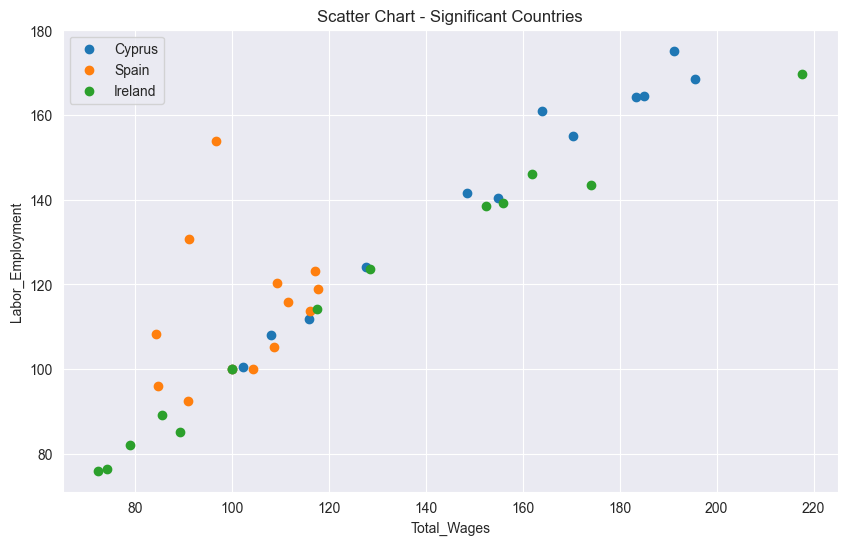

In [98]:
plt.figure(figsize=(10, 6))
for country in significant:
    data = pl_input[pl_input['Country'] == country]
    plt.scatter(data['Total_Wages'], data['Labor_Employment'], label=country)
plt.xlabel('Total_Wages')
plt.ylabel('Labor_Employment')
plt.title('Scatter Chart - Significant Countries')
plt.legend()
plt.show()

In the scatter plot for significant countries we can a clear pattern or relationship between the 'Labor_Employment' and 'Total_Wages' variables, this implys a somewhat linear relationship.

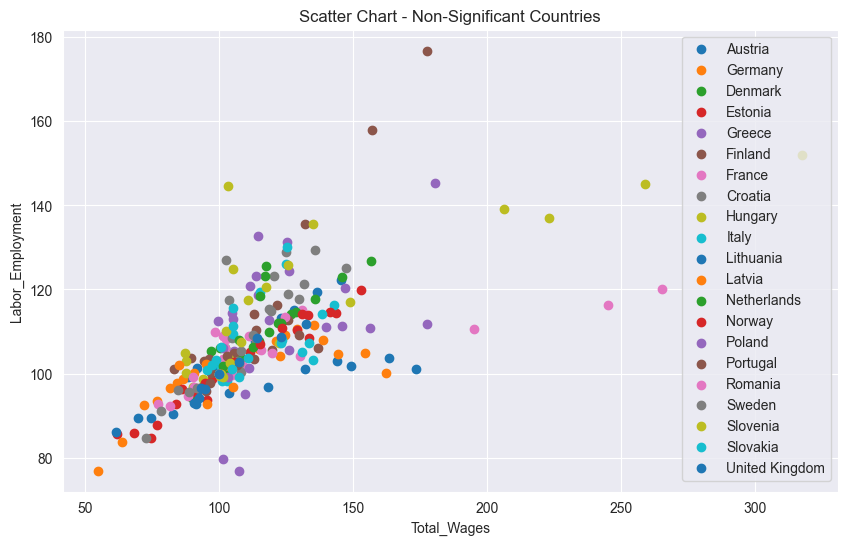

In [99]:
plt.figure(figsize=(10, 6))
for country in non_significant:
    data = pl_input[pl_input['Country'] == country]
    plt.scatter(data['Total_Wages'], data['Labor_Employment'], label=country)
plt.xlabel('Total_Wages')
plt.ylabel('Labor_Employment')
plt.title('Scatter Chart - Non-Significant Countries')
plt.legend()
plt.show()

For the non significant countries we can see alot of overlap and a non observable trend, implying no clear relationship between total wages and labor employment.

# Compound Annual Growth Rate
CAGR is used to analyze returns or the growth of various metrics such as revenue over years. It provides a standardized metric for evaluating their performance.


In [100]:
def calculate_cagr(data, column):
    # Get the beginning and ending value
    beginning_value = data[column].iloc[0]
    ending_value = data[column].iloc[-1]

    num_years = len(data)

    # Calculate CAGR
    cagr = (np.power(ending_value / beginning_value, 1 / num_years) - 1) * 100

    return cagr

CAGR for Austria in years 2010 to 2022 : 2.29%
CAGR for Cyprus in years 2010 to 2022 : -1.02%
CAGR for Germany in years 2010 to 2022 : 1.53%
CAGR for Denmark in years 2010 to 2022 : 3.18%
CAGR for Estonia in years 2010 to 2020 : 6.45%
CAGR for Greece in years 2010 to 2022 : -7.57%
CAGR for Spain in years 2010 to 2022 : -2.16%
CAGR for Finland in years 2010 to 2022 : 2.14%
CAGR for France in years 2010 to 2022 : -0.56%
CAGR for Croatia in years 2010 to 2022 : -0.32%
CAGR for Hungary in years 2010 to 2022 : 4.39%
CAGR for Ireland in years 2010 to 2022 : 2.47%
CAGR for Italy in years 2010 to 2022 : -0.55%
CAGR for Lithuania in years 2010 to 2022 : 4.96%
CAGR for Latvia in years 2010 to 2022 : 3.74%
CAGR for Netherlands in years 2010 to 2022 : 2.05%
CAGR for Norway in years 2010 to 2022 : 3.45%
CAGR for Poland in years 2010 to 2022 : 2.12%
CAGR for Portugal in years 2010 to 2022 : -4.24%
CAGR for Romania in years 2010 to 2020 : 2.98%
CAGR for Sweden in years 2010 to 2022 : 2.74%
CAGR for S

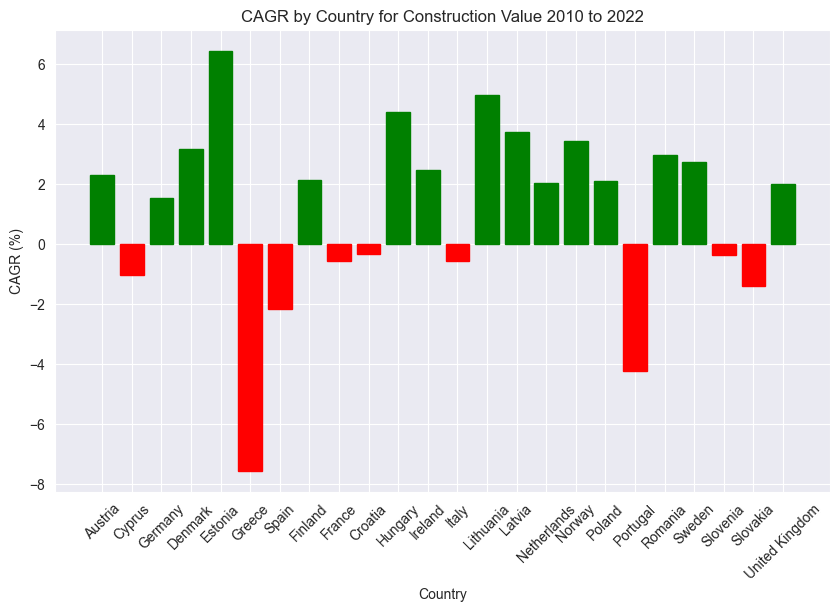

In [104]:

group_names = pl_input['Country'].unique()
cagr_values = []
var = 'Construction_Value'

for country in group_names:

    country_data = pl_input[pl_input['Country'] == country]

    cagr = calculate_cagr(country_data, var)
    cagr_values.append(cagr)

    minYear = country_data['Year'].iloc[0].year
    maxYear = country_data['Year'].iloc[-1].year

    print(f"CAGR for {country} in years {minYear} to {maxYear} : {cagr:.2f}%")


plt.figure(figsize=(10, 6))
bars = plt.bar(group_names, cagr_values)

#positive values = green,
#negative values = red
for bar in bars:
    if bar.get_height() >= 0:
        bar.set_color('green')
    else:
        bar.set_color('red')

plt.xlabel('Country')
plt.ylabel('CAGR (%)')
plt.title(f'CAGR by Country for {var.replace("_"," ")} 2010 to 2022')
plt.xticks(rotation=45)
plt.show()